In [2178]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import date
import csv
import datetime
from pathlib import Path
today = date.today()


In [2179]:
# File to Load
vaccine_csv_path = Path("US.csv")

#Read csv data
US = pd.read_csv("US.csv")
US


,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,...,search_trends_xeroderma,search_trends_xerostomia,search_trends_yawn,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,US,2020-01-01,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.65,0.36,0.17,-0.975309,-5.913580,6.314815,0.0,64.77,-5.790123,70.015448
1,US,2020-01-02,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.60,0.39,0.16,2.660494,-1.648148,6.709877,0.0,40.64,-0.759259,78.356538
2,US,2020-01-03,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.46,0.38,0.16,1.055556,-2.648148,5.703704,0.0,30.48,-2.475309,77.390895
3,US,2020-01-04,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.71,0.38,0.17,0.006173,-6.617284,9.197531,0.0,30.48,-5.407407,67.237910
4,US,2020-01-05,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,2.81,0.38,0.17,5.203704,0.543210,8.580247,0.0,NaN,-2.790123,56.438457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,US,2022-09-13,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,21.983333,12.761111,33.616667,0.0,NaN,10.966667,49.999442
987,US,2022-09-14,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,23.518519,21.407407,27.049383,0.0,NaN,12.790123,51.394811
988,US,2022-09-15,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,US,2022-09-16,ChIJCzYy5IS16lQRQrfeQ5K5Oxw,Q30,country/USA,US,United States of America,US,USA,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2180]:
# new data frame for time series analysis: date vs new vaccine doses administered per vaccine, clean NaN  
vaccination_df = US[['date', 'new_vaccine_doses_administered', 'new_vaccine_doses_administered_pfizer', 'new_vaccine_doses_administered_moderna', 'new_vaccine_doses_administered_janssen']]
vaccination_df = vaccination_df.dropna()

#sort date chronologically
vaccination_df_clean = vaccination_df.sort_values('date', ascending=True)

# ignore NaN
vaccination_timeseries = vaccination_df_clean.dropna()

vaccination_timeseries


,date,new_vaccine_doses_administered,new_vaccine_doses_administered_pfizer,new_vaccine_doses_administered_moderna,new_vaccine_doses_administered_janssen
433,2021-03-09,2721218.0,803936.0,699045.0,99591.0
434,2021-03-10,3150257.0,976933.0,899906.0,150730.0
435,2021-03-11,3462502.0,1103761.0,1198010.0,179558.0
436,2021-03-12,3437143.0,1251480.0,1435922.0,235257.0
437,2021-03-13,2193720.0,0.0,0.0,0.0
...,...,...,...,...,...
984,2022-09-11,0.0,0.0,0.0,0.0
985,2022-09-12,0.0,0.0,0.0,0.0
986,2022-09-13,0.0,0.0,0.0,0.0
987,2022-09-14,0.0,0.0,0.0,0.0


In [2181]:
#convert date to string
vaccination_df_clean['DateTypeCol'] = pd.to_datetime(vaccination_df_clean['date'])
vaccination_df_clean['ConvertedDate'] = vaccination_df_clean['DateTypeCol'].dt.strftime('%Y-%m')

# ignore NaN
vaccination_timeseries = vaccination_df_clean.dropna()

#rename ConvertedDate column to date_str
vaccination_timeseries = vaccination_df_clean.rename(columns={'ConvertedDate': 'date_str'})

vaccination_timeseries

,date,new_vaccine_doses_administered,new_vaccine_doses_administered_pfizer,new_vaccine_doses_administered_moderna,new_vaccine_doses_administered_janssen,DateTypeCol,date_str
433,2021-03-09,2721218.0,803936.0,699045.0,99591.0,2021-03-09,2021-03
434,2021-03-10,3150257.0,976933.0,899906.0,150730.0,2021-03-10,2021-03
435,2021-03-11,3462502.0,1103761.0,1198010.0,179558.0,2021-03-11,2021-03
436,2021-03-12,3437143.0,1251480.0,1435922.0,235257.0,2021-03-12,2021-03
437,2021-03-13,2193720.0,0.0,0.0,0.0,2021-03-13,2021-03
...,...,...,...,...,...,...,...
984,2022-09-11,0.0,0.0,0.0,0.0,2022-09-11,2022-09
985,2022-09-12,0.0,0.0,0.0,0.0,2022-09-12,2022-09
986,2022-09-13,0.0,0.0,0.0,0.0,2022-09-13,2022-09
987,2022-09-14,0.0,0.0,0.0,0.0,2022-09-14,2022-09


In [2182]:
#Group by Date chronologically
vaccination_timeseries = vaccination_timeseries.sort_values('date_str', ascending=True)

#drop other date columns
vaccination_timeseries = vaccination_timeseries[['date_str', 
                                                    'new_vaccine_doses_administered', 
                                                    'new_vaccine_doses_administered_pfizer', 
                                                    'new_vaccine_doses_administered_moderna', 
                                                    'new_vaccine_doses_administered_janssen']]
vaccination_timeseries


,date_str,new_vaccine_doses_administered,new_vaccine_doses_administered_pfizer,new_vaccine_doses_administered_moderna,new_vaccine_doses_administered_janssen
433,2021-03,2721218.0,803936.0,699045.0,99591.0
455,2021-03,4165226.0,1505022.0,1072943.0,91456.0
454,2021-03,3583688.0,1048865.0,680163.0,60239.0
453,2021-03,2831562.0,1356914.0,928403.0,64706.0
452,2021-03,1210109.0,1734892.0,1438107.0,108259.0
...,...,...,...,...,...
983,2022-09,0.0,0.0,0.0,0.0
984,2022-09,0.0,0.0,0.0,0.0
985,2022-09,0.0,0.0,0.0,0.0
986,2022-09,0.0,0.0,0.0,0.0


In [2183]:
#groupby Date and sum columns
vaccination_timeseries = vaccination_timeseries.groupby(['date_str'],as_index = False).sum()

vaccination_timeseries

,date_str,new_vaccine_doses_administered,new_vaccine_doses_administered_pfizer,new_vaccine_doses_administered_moderna,new_vaccine_doses_administered_janssen
0,2021-03,65023881.0,30067622.0,24994261.0,3098523.0
1,2021-04,90513434.0,50241487.0,34682937.0,4924026.0
2,2021-05,50663184.0,32278632.0,19907021.0,2545478.0
3,2021-06,25445235.0,20932966.0,8993954.0,1629129.0
4,2021-07,16485223.0,12696053.0,5368851.0,1003177.0
5,2021-08,24291403.0,17013462.0,6563772.0,949718.0
6,2021-09,22706564.0,15978789.0,6034123.0,641685.0
7,2021-10,29320994.0,21193063.0,7291289.0,632600.0
8,2021-11,42200075.0,20413351.0,17253436.0,998325.0
9,2021-12,46333763.0,28218519.0,17624654.0,982595.0


In [2184]:
#drop other date columns
vaccination_timeseries = vaccination_timeseries[['date_str', 
                                                    'new_vaccine_doses_administered', 
                                                    'new_vaccine_doses_administered_pfizer', 
                                                    'new_vaccine_doses_administered_moderna', 
                                                    'new_vaccine_doses_administered_janssen']]
vaccination_timeseries



,date_str,new_vaccine_doses_administered,new_vaccine_doses_administered_pfizer,new_vaccine_doses_administered_moderna,new_vaccine_doses_administered_janssen
0,2021-03,65023881.0,30067622.0,24994261.0,3098523.0
1,2021-04,90513434.0,50241487.0,34682937.0,4924026.0
2,2021-05,50663184.0,32278632.0,19907021.0,2545478.0
3,2021-06,25445235.0,20932966.0,8993954.0,1629129.0
4,2021-07,16485223.0,12696053.0,5368851.0,1003177.0
5,2021-08,24291403.0,17013462.0,6563772.0,949718.0
6,2021-09,22706564.0,15978789.0,6034123.0,641685.0
7,2021-10,29320994.0,21193063.0,7291289.0,632600.0
8,2021-11,42200075.0,20413351.0,17253436.0,998325.0
9,2021-12,46333763.0,28218519.0,17624654.0,982595.0


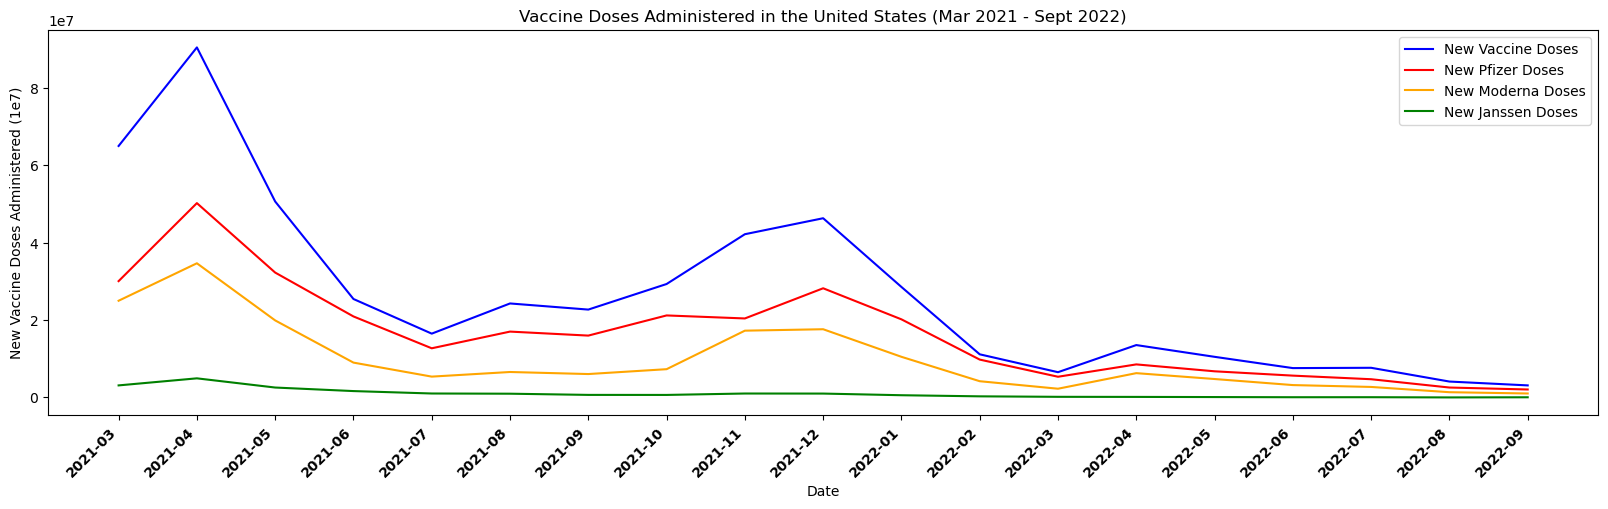

In [2185]:

vaccination_line = plt.plot(vaccination_timeseries['date_str'], vaccination_timeseries['new_vaccine_doses_administered'], color="blue")
vaccination_line = plt.plot(vaccination_timeseries['date_str'], vaccination_timeseries['new_vaccine_doses_administered_pfizer'], color="red")
vaccination_line = plt.plot(vaccination_timeseries['date_str'], vaccination_timeseries['new_vaccine_doses_administered_moderna'], color="orange")
vaccination_line = plt.plot(vaccination_timeseries['date_str'], vaccination_timeseries['new_vaccine_doses_administered_janssen'], color="green")
plt.xlabel('Date')
plt.ylabel('New Vaccine Doses Administered (1e7)')
plt.title('Vaccine Doses Administered in the United States (Mar 2021 - Sept 2022)')
plt.legend(["New Vaccine Doses", "New Pfizer Doses", "New Moderna Doses", "New Janssen Doses"])
plt.xticks(vaccination_timeseries['date_str'], rotation=45, ha='right')
plt.title('Vaccine Doses Administered in the United States (Mar 2021 - Sept 2022)')
plt.xticks(weight = 'bold')
plt.show()

In [ ]:
#fix x axis to display data in chronological order (x-axis)

#rename axis titles

#add markers?
#hover to show value feature?